# Technical Report: Generating Human Faces with DCGAN #
## (a) Objective ##
The goal of this project is to develop a Deep Convolutional Generative Adversarial Network (DCGAN) to generate realistic images of human faces. This problem is significant in various fields such as entertainment, fashion, and privacy-preserving data augmentation. Generating realistic human faces can assist in creating synthetic datasets, enhancing video game characters, and anonymizing facial data.

In the fields of Software Engineering and Data Science, efficiently and accurately solving real-world scenarios with data-driven approaches is crucial. This project aims to develop a Deep Convolutional Generative Adversarial Network (DCGAN) to generate realistic human faces. The model uses a dataset of 7,200 images of human faces. 

## (b) Algorithm of the Solution ##
The solution involves creating a DCGAN, consisting of two neural networks: a Generator and a Discriminator. The Generator creates fake images from random noise, while the Discriminator evaluates these images against real ones. The networks are trained simultaneously in a competitive setting, improving the Generator's ability to create realistic images and the Discriminator's ability to distinguish them from real images.

Loading and Preprocessing the Dataset

The dataset contains images of human faces. The images are resized to 64x64 pixels and normalized to the range [-1, 1].

Load and preprocess images:
Read images from the dataset.
Resize images to 64x64 pixels.
Normalize pixel values to the range [-1, 1].
Define the Models
Define the generator model:

Use a dense layer followed by batch normalization and LeakyReLU activation.
Reshape the output to a 4D tensor.
Use Conv2DTranspose layers to upsample the image.
Define the discriminator model:

Use Conv2D layers followed by LeakyReLU activation and dropout.
Flatten the output and use a dense layer for classification.
Define Loss Functions and Optimizers
Define loss functions:

Use binary cross-entropy for both generator and discriminator losses.
Define optimizers:

Use the Adam optimizer with a learning rate of 1e-5 and 1e-4 for both the generator and discriminator fo different models

Training the DCGAN

Train the model:
For each epoch:
Generate random noise vectors.
Generate fake images using the generator.
Compute discriminator loss using real and fake images.
Compute generator loss using fake images.
Update the generator and discriminator using their respective losses.
Save and Evaluate the Model
Save the trained models:

Save the generator and discriminator models in Keras format.
Visualize generated images:

Generate and display images from the trained generator to assess the quality.

## Approach to Solving the Problem ##
Software Tools
Python: Programming language
TensorFlow/Keras: Deep learning libraries
NumPy: Numerical computing
Matplotlib: Data visualization
PIL: Image processing

### Theoretical Foundations

Generator Model
The generator takes a random noise vector as input and generates an image. The architecture includes:

Dense layer followed by BatchNormalization and LeakyReLU
Reshape layer to reshape the output to a 4D tensor
Series of Conv2DTranspose layers to upscale the image

Discriminator Model
The discriminator takes an image as input and outputs a scalar value indicating whether the image is real or fake. The architecture includes:

Conv2D layers followed by LeakyReLU and Dropout
Flatten and Dense layers for classification

Loss Functions

Generator Loss: Binary cross-entropy between the generated image output and the label (1 for real).

Discriminator Loss: Binary cross-entropy between the real image output and the label (1 for real) plus the binary cross-entropy between the fake image output and the label (0 for fake).

Generator Network: Transforms random noise into realistic images using transposed convolutional layers with batch normalization and Leaky ReLU activations.
G(z)=ConvT(LeakyReLU(BN(Dense(z))))

Discriminator Network: Classifies images as real or fake using convolutional layers with Leaky ReLU activations and dropout for regularization.
D(x)=Dense(Flatten(Dropout(LeakyReLU(Conv(x)))))

Loss Functions:

Generator Loss:
            LG = −Ez∼pz[log(D(G(z)))]
Discriminator Loss:
            𝐿𝐷 = −𝐸x∼p data[logD(x)]− Ez∼pz[log(1−D(G(z)))]         


### Dataset Description

Dataset: Collection of 7,200 human face images.
Content: Various ages, genders, and ethnicities, including some GAN-generated images

Data Preprocessing
Normalization:
Pixel values are normalized to the range [−1,1] to match the output range of the tanh activation function in the Generator.
\text{image_data} = (\text{image_data} - 127.5) / 127.5

Data Cleaning:
All images are resized 64 * 64 pixels. 
Images that do not conform the required shape are excluded. Missing values rae not applicable since we handle all images as individual file.

Descriptive Analysis:
Displaying sample images to understand the dataset visually.

Outlier Handling:
Outliers are not explicitly handeled, as we assume the dataset is curated to contain valid face images. 
The DCGAN model will learn to generate typical examples seen in the dataset.

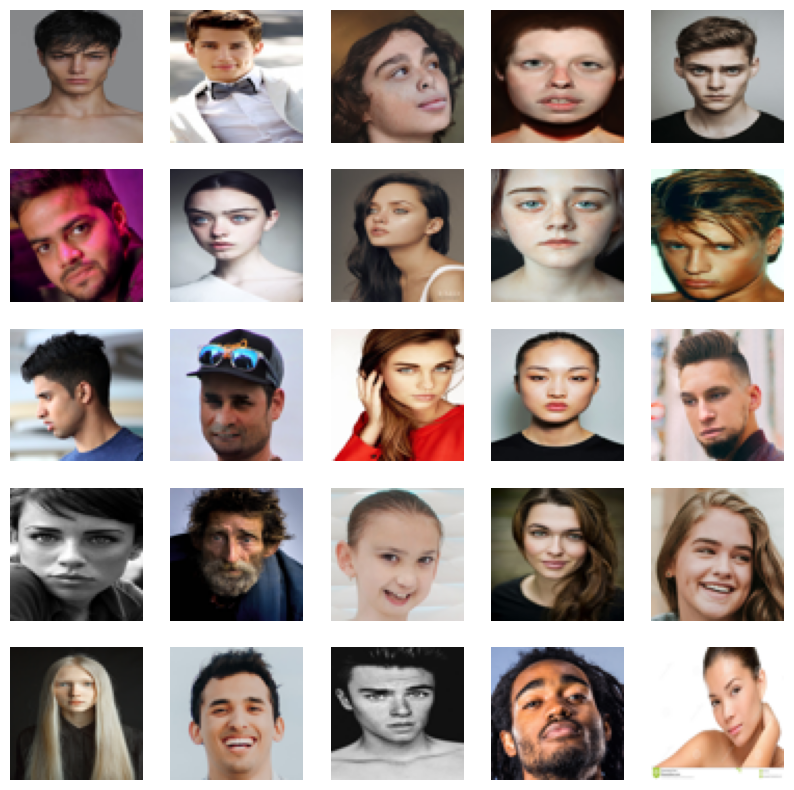

Loaded 6980 images with shape: (6980, 64, 64, 3)


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
from IPython.display import clear_output
import time


# Path to the folder containing images
image_folder_path = '/Users/rameshchidurala/Documents/DSC-550 Assignments/Humans'

# Load images from folder
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(img_size)
            img = np.array(img)
            if img.shape == (64, 64, 3):  # Ensure all images are 3-channel
                images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    images = np.array(images)
    return images

# Load and preprocess images
image_data = load_images_from_folder(image_folder_path)
image_data = (image_data - 127.5) / 127.5  # Normalize to [-1, 1]

# Function to plot sample images
def plot_sample_images(images, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.imshow((images[i] * 127.5 + 127.5).astype(np.uint8))  # De-normalize to [0, 255] for display
        plt.axis('off')
    plt.show()

# Plot 25 sample images from the training data
plot_sample_images(image_data, num_images=25)

# Verify data shape
print(f"Loaded {len(image_data)} images with shape: {image_data.shape}")

# Model Implementation and Training #

Generator Model

In [3]:
# Define the generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    return model


Discriminator Model

In [4]:
# Define the discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

Training the Model

In [5]:
# Create generator and discriminator
generator = make_generator_model()
discriminator = make_discriminator_model()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


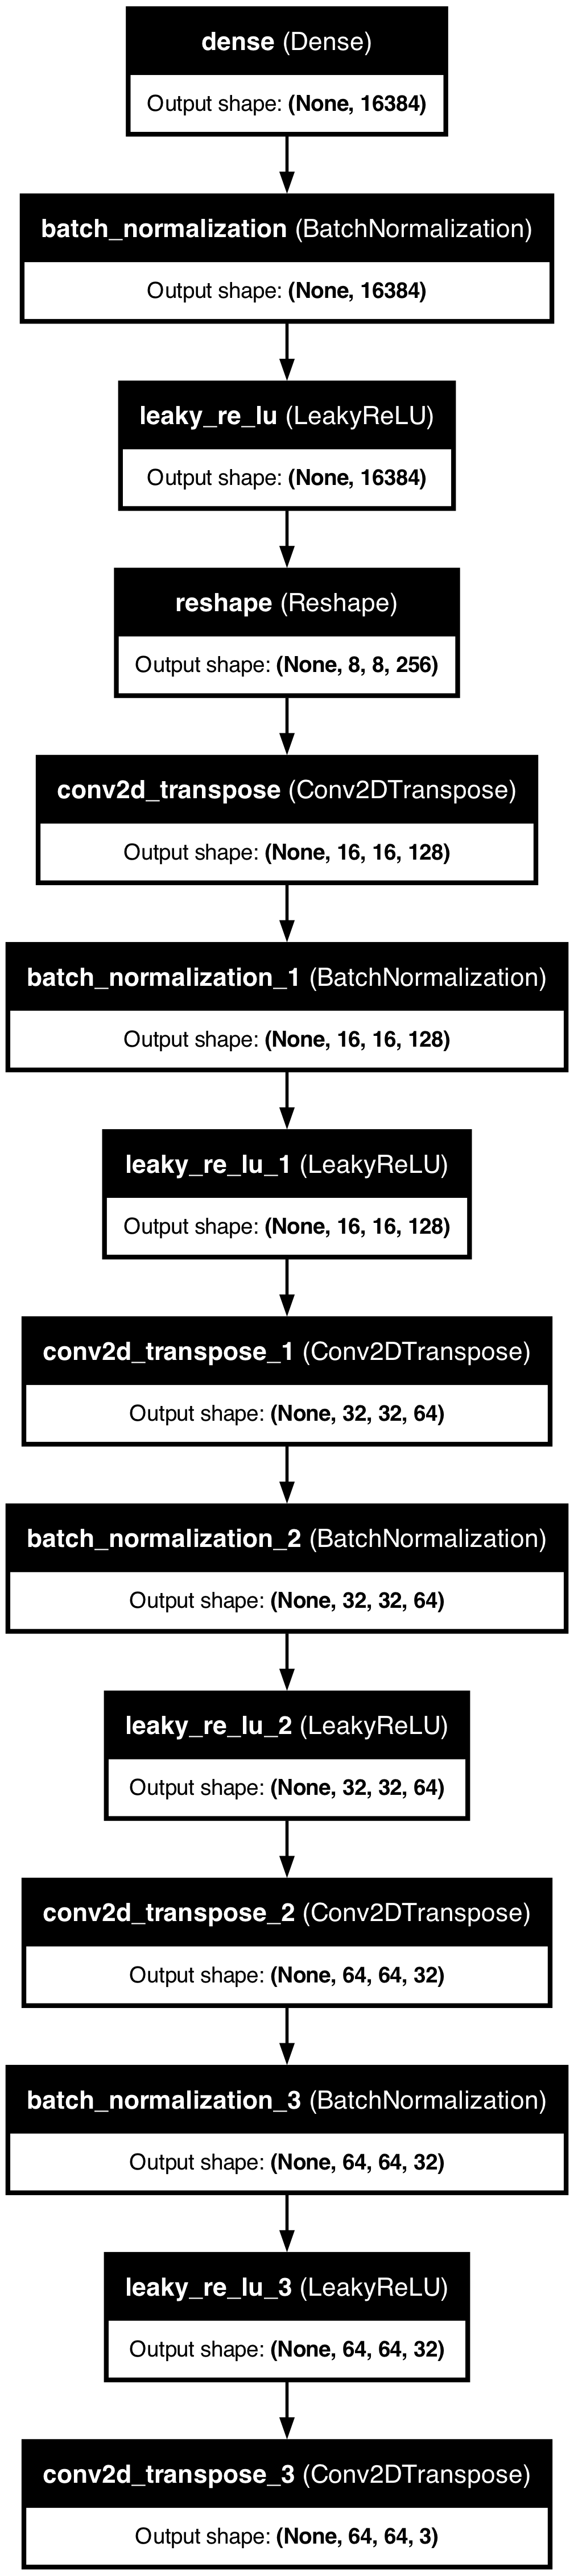

In [10]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz


# Plot and save the generator model architecture
plot_model(generator, to_file='generator_model.png', show_shapes=True, show_layer_names=True)


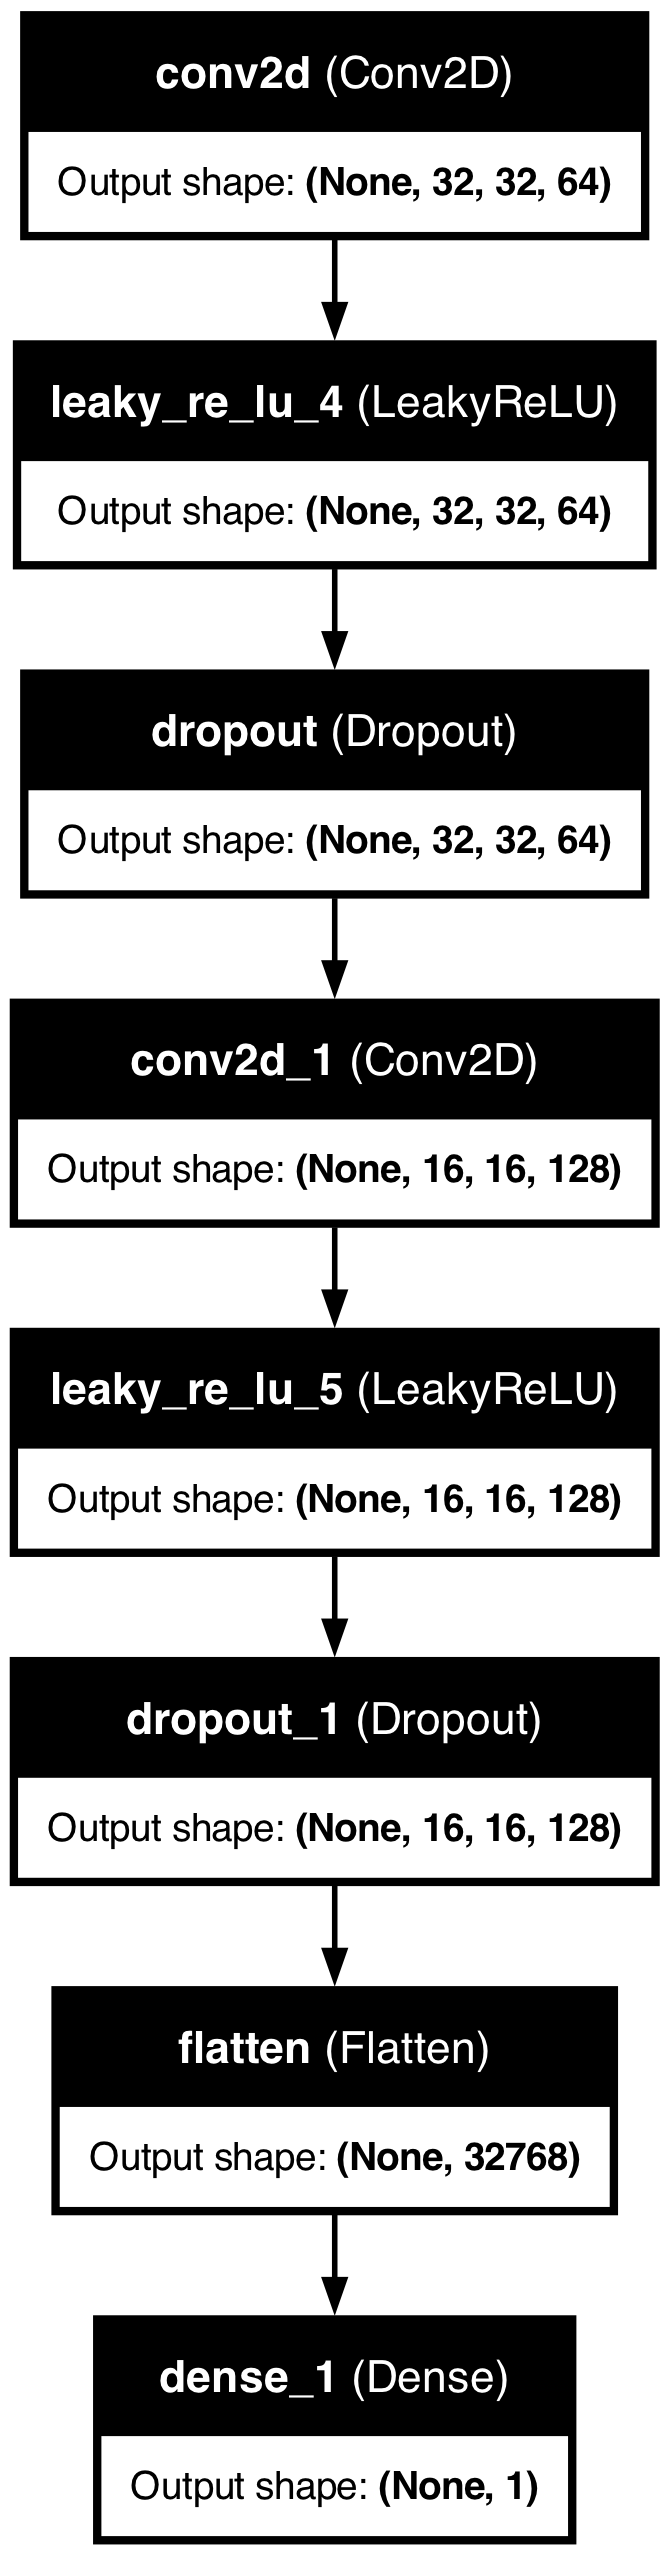

In [9]:
# Plot and save the discriminator model architecture
plot_model(discriminator, to_file='discriminator_model.png', show_shapes=True, show_layer_names=True)


In [6]:
# Define loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4) # Adjusted learning rate
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4) # Adjusted learning rate

In [7]:
# Checkpoint to save the model
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [8]:
# Training parameters
EPOCHS = 200  # Reduced number of epochs for quick testing
BATCH_SIZE = 64 # Adjust based on available hardware
BUFFER_SIZE = 10000  # Adjusted buffer size to match dataset size
noise_dim = 100
num_examples_to_generate = 16

# Prepare the dataset
train_dataset = tf.data.Dataset.from_tensor_slices(image_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [9]:
# This function performs one training step (one batch)
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [10]:
# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] * 127.5 + 127.5).numpy().astype(np.uint8))
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [11]:
# This function performs the training over all epochs
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)



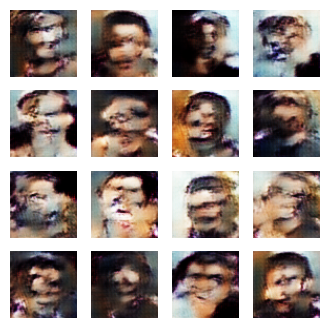

In [12]:
import time
from IPython.display import clear_output
# Train the DCGAN model
train(train_dataset, EPOCHS)

In [22]:
# Save the previous models
def save_previous_models(generator, discriminator):
    generator_save_path = './previous_models/generator.h5'
    discriminator_save_path = './previous_models/discriminator.h5'
    
    # Ensure the save directory exists
    os.makedirs(os.path.dirname(generator_save_path), exist_ok=True)
    os.makedirs(os.path.dirname(discriminator_save_path), exist_ok=True)
    
    # Save the models
    generator.save(generator_save_path)
    discriminator.save(discriminator_save_path)
    
    print("Previous models saved successfully.")

After number of times parameter tuning I built the below model which is doing better compared to previous model. I kept the previous model to compare the diffrence between them.
I built the below model by changing few parameters suchs as epochs, batch_size, learning rate etc. Added few visualization steps for evaluation.

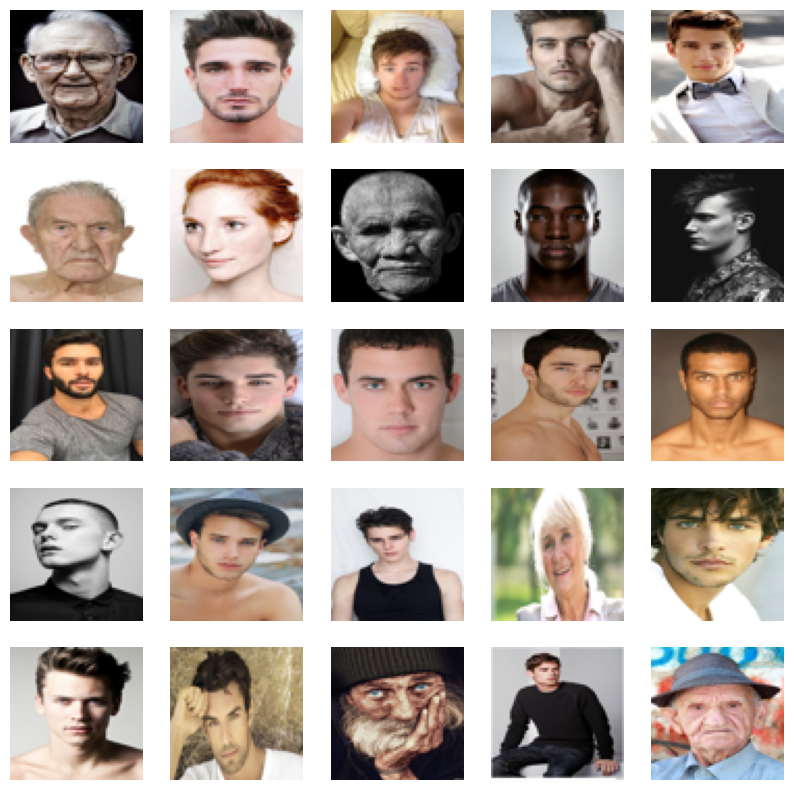

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
from IPython.display import clear_output
import time

# Path to the folder containing images
image_folder_path = 'C:/Users/Swathi Chidurala/Documents/DSC-550/Humans'

# Load images from folder
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(img_size)
            img = np.array(img)
            if img.shape == (64, 64, 3):  # Ensure all images are 3-channel
                images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    images = np.array(images)
    return images

# Load and preprocess images
image_data = load_images_from_folder(image_folder_path)
image_data = (image_data - 127.5) / 127.5  # Normalize to [-1, 1]

# Plot 25 sample images from the training data
def plot_sample_images(images, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.imshow((images[i] * 127.5 + 127.5).astype(np.uint8))  # De-normalize to [0, 255] for display
        plt.axis('off')
    plt.show()

plot_sample_images(image_data, num_images=25)


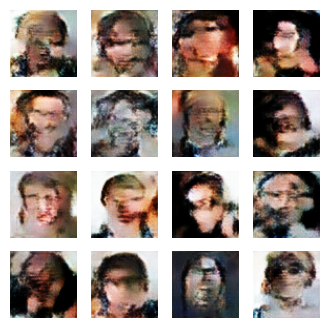

In [3]:
# Define the DCGAN architecture
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# Define the loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

# Checkpoint to save the model
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Training loop
EPOCHS = 400
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime to visualize progress in the animated GIF
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# This function performs one training step (one batch)
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# This function performs the training over all epochs
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] * 127.5 + 127.5).numpy().astype(np.uint8))
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

BUFFER_SIZE = 10000
BATCH_SIZE = 32 # Adjust batch size to a more reasonable number

# Create a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(image_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Train the model
train(train_dataset, EPOCHS)


Model Saving

In [6]:
# Save the trained models
generator_save_path = './trained_models/generator.keras'
discriminator_save_path = './trained_models/discriminator.keras'

# Ensure the save directory exists
os.makedirs(os.path.dirname(generator_save_path), exist_ok=True)
os.makedirs(os.path.dirname(discriminator_save_path), exist_ok=True)

# Save the models in Keras format
generator.save(generator_save_path)
discriminator.save(discriminator_save_path)

print("Trained models saved successfully.")



Trained models saved successfully.


## Evaluate the Model

For evaluating the model, we can visualize the generated images and compute the loss values during training. Since GANs don't have a straightforward evaluation metric like classification accuracy, visualization is a common method to assess the quality of generated images.

### Visualize High-Quality Images from Generator
To visualize the high-quality images generated by the generator:

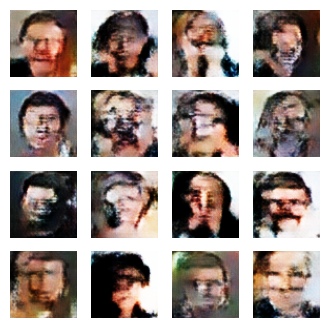

In [142]:
# Function to generate and visualize images
def visualize_generated_images(model, num_images=16):
    noise = tf.random.normal([num_images, noise_dim])
    predictions = model(noise, training=False)
    
    fig = plt.figure(figsize=(4, 4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] * 127.5 + 127.5).numpy().astype(np.uint8))
        plt.axis('off')
    
    plt.show()

# Visualize images generated by the trained model
visualize_generated_images(generator)


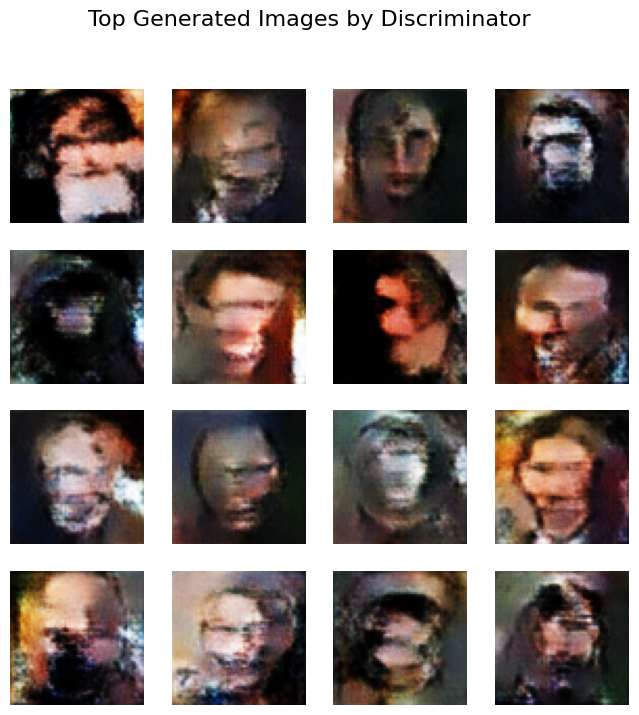

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Function to display the top N generated images
def display_top_generated_images(images, num_display=16):
    fig = plt.figure(figsize=(8, 8))
    plt.suptitle('Top Generated Images by Discriminator', fontsize=16)

    for i in range(num_display):
        plt.subplot(4, 4, i+1)
        plt.imshow((images[i] * 127.5 + 127.5).astype(np.uint8))
        plt.axis('off')

    plt.show()

# Generate a batch of images
num_images = 100  # Number of images to generate and evaluate
noise = tf.random.normal([num_images, noise_dim])
generated_images = generator(noise, training=False)

# Get the discriminator scores for the generated images
discriminator_scores = discriminator(generated_images, training=False)

# Sort the generated images based on the discriminator scores
sorted_indices = np.argsort(discriminator_scores.numpy().flatten())[::-1]
sorted_images = generated_images.numpy()[sorted_indices]

# Display the top N images
num_display = 16
display_top_generated_images(sorted_images, num_display=num_display)


# Analysis of Findings #

Initial Model Performance:
The initial model was trained for 200 epochs with a batch size of 64 and an Adam optimizer with a learning rate of 1e-4. The images generated during the initial stages showed significant noise and lack of structure, which was expected as the model was just starting to learn.It started learning slowly some facial patterns while it is running But around the 200th epoch, the generated images still remain same with some minor changes .

Parameter Tuning and Improvements:
Recognizing the need for improvement, I undertook extensive parameter tuning. The changes included:

Reducing the batch size from 64 to 32 to allow the model to learn from more diverse mini-batches.
Increasing the number of epochs from 200 to 400 to provide the model with more opportunities to learn.
Adjusting the Adam optimizer learning rate from 1e-5 to 1e-4 to accelerate the learning process.
These adjustments led to noticeable improvements in the generated images. Although the images still weren't completely realistic, the model began to recognize and generate facial features more effectively as training progressed.

Observations and Interpretation
Generator's Performance: The generator showed a significant improvement over epochs, producing images with more defined facial features and structures. However, the generated images still lacked fine details and sharpness found in real images. The increased training epochs allowed the generator to learn more intricate details, although this also increased the training time substantially.

Discriminator's Role: The discriminator played a crucial role in improving the quality of generated images by providing continuous feedback to the generator. As the discriminator became better at distinguishing real from fake images, the generator was forced to produce higher quality images to deceive the discriminator.

Challenges and Limitations: Despite parameter tuning and prolonged training, generating high-quality, realistic images remains challenging. This can be attributed to the complexity of human faces and the high-dimensional nature of image data. The trial-and-error nature of parameter tuning requires extensive computational resources and time. Throughout this project, I experimented with around 50 different parameter configurations, each requiring careful monitoring and adjustment.

Future Directions
Further Hyperparameter Tuning: Additional tuning of hyperparameters such as learning rate, batch size, and model architecture may yield better results. Using grid search or random search could systematically explore the parameter space.

Advanced Techniques: Incorporating advanced techniques such as Progressive GANs or StyleGANs could lead to better performance. These models have been shown to produce high-quality, realistic images by leveraging more sophisticated network architectures and training procedures.

Extended Training: Increasing the number of epochs further and continuing to monitor and adjust the training process might lead to incremental improvements in the generated images. However, this comes with the trade-off of increased computational costs and time.

Conclusion
Overall, this project demonstrated the potential and challenges of using DCGANs for generating realistic images of human faces. While the generated images improved over time and began to capture facial features, achieving high-quality, realistic images remains a complex task requiring significant computational resources and careful parameter tuning. This project highlights the importance of iterative experimentation and continuous monitoring in deep learning model development.

Recording Link: https://vimeo.com/989763803/2333e1cc68?share=copy

## (d) References:

Kaggle. (2020). Human Faces [Data set]. https://www.kaggle.com/datasets/ashwingupta3012/human-faces

Projectpro. (2024, March 19). 15 Generative Adversarial Networks (GAN) Based Project Ideas. https://www.projectpro.io/article/generative-adversarial-networks-gan-based-projects-to-work-on/530

Damecha.H. (2021, August 27). A Detailed Explanation of GAN with Implementation Using Tensorflow and Keras. https://www.analyticsvidhya.com/blog/2021/06/a-detailed-explanation-of-gan-with-implementation-using-tensorflow-and-keras/

